In [5]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


# Evaluating polygenic risk scores in 1000 Genomes and 23andMe

The goal of this exercise is to explore computing polygenic risk scores (PRSs). We will apply to 23andme data (in which you could learn about your own personal predictions) as well as to 1000 Genomes data (to learn about the distributions of PRSs and biases across population groups).

We will focus on published PRSs for three traits:

* **LDL**:
Scores were taken from [this paper](https://www.nature.com/articles/s41586-021-04064-3). They were downloaded from http://csg.sph.umich.edu/willer/public/glgc-lipids2021/results/prs_weights/GLGC_2021_ALL_LDL_PRS_weights_PT.txt

* **Height**
Scores were downloaded from the [Polygenic Score Catalog](https://www.pgscatalog.org/), accession PGS001229.

* **Type 2 Diabetes**
Scores were downloaded from the [Polygenic Score Catalog](https://www.pgscatalog.org/), accession PGS000713.

In the directory `~/public/prs-exercise` you will find:
* `ldl_prs.txt`, `Height_prs.txt`, and `T2D_prs.txt`, which give SNP weights for the three polygenic risk scores.
* `1000G_merged_cleaned.vcf.gz`: 1000 Genomes data, subsetted to include only SNPs relevant to the PRSs to save time/space
* `imputed_23andme_merged_cleaned.vcf.gz`: My 23andme data, including SNPs imputed from 1000 Genomes project
* `imputed_23andme_merged_subset.sorted.vcf.gz`: My23andme data, subsetted to SNPs relevant to the PRSs used here to save time/space.

### Preprocessing (optional)
In case you'd like to try this on your own data, see the script here:

```
~/public/prs-exercise/impute_23andme.sh
```

This script imputes 1000 Genomes SNPs into my 23andme file, then does some cleanup to merge all chromosomes to a single VCF file with no duplicate IDs. Imputation took a while (over an hour) and required giving Beagle a file of duplicate markers to exclude.

### Exercises

**Exercise 1**: Run the bash cell below to compute PRSs for 1000 Genomes and the 23andme file for the three traits given.

We already put example code for you. But read about `plink --score` here: https://www.cog-genomics.org/plink/1.9/score to make sure you understand what the commands are doing.

If the runs were successful, you should see output files named `*.profile` in a folder named `results/`. If your run gets killed due to memory usage you can use precomputed results in `~/public/prs-exercise/results`.

**Exercise 2**: Using the cell below (or your own code), plot:
* The distribution of PRSs for each trait separately by 1000 Genomes superpopulation
* The value of the 23andme sample's PRS score

You can change the trait being plotted by setting the `trait` variable at the top of the cell.
You can change the set of super populations being plotted by setting the variable `show_spops`.

Where does the 23andme sample fall relative to other Europeans for the 3 traits? Average? Below average? Above average?

### Discussion Questions

**Question 1**: Take note of any biases across superpopulations in terms of the average of the distribution of scores. What could cause these biases? 

**Question 2**: What is the upper bound of performance we can hope to achieve with a PRS?

**Question 3**: We ignored covariates in our analyses above. How should we deal with those?

In [3]:
%%bash
# Run this here or in the terminal to generate scores. Make sure you are on a high memory instance!
# Alternatively, you can just rely on our precomputed results in ~/public/prs-exercise/
# which the cell below does by default to save you time

#OUTDIR=results/
OUTDIR=~/public/prs-exercise/results

mkdir -p ${OUTDIR}

####### Compute PRS for 1000 Genomes and 23andme #######
for trait in ldl Height T2D
do
    plink --vcf ~/public/prs-exercise/1000G_merged_cleaned.vcf.gz \
        --score ~/public/prs-exercise/${trait}_prs.txt sum \
        --out ${OUTDIR}/1000G_${trait}
    
    plink --vcf ~/public/prs-exercise/imputed_23andme_merged_subset.sorted.vcf.gz \
        --score ~/public/prs-exercise/${trait}_prs.txt sum \
        --out ${OUTDIR}/my_${trait}
done


PLINK v1.90b6.9 64-bit (4 Mar 2019)            www.cog-genomics.org/plink/1.9/
(C) 2005-2019 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/grader-cse284-01/public/prs-exercise/results/1000G_ldl.log.
Options in effect:
  --out /home/grader-cse284-01/public/prs-exercise/results/1000G_ldl
  --score /home/grader-cse284-01/public/prs-exercise/ldl_prs.txt sum
  --vcf /home/grader-cse284-01/public/prs-exercise/1000G_merged_cleaned.vcf.gz

515699 MB RAM detected; reserving 257849 MB for main workspace.
--vcf:
/home/grader-cse284-01/public/prs-exercise/results/1000G_ldl-temporary.bed +
/home/grader-cse284-01/public/prs-exercise/results/1000G_ldl-temporary.bim +
/home/grader-cse284-01/public/prs-exercise/results/1000G_ldl-temporary.fam
written.
217614 variants loaded from .bim file.
2504 people (0 males, 0 females, 2504 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
/home/grader-cse284-01/public/prs-exercise/results/1000G_ldl.nosex .
Using 1 thread 

to allele code mismatch); see
/home/grader-cse284-01/public/prs-exercise/results/1000G_ldl.nopred for
details.
to allele code mismatch); see
/home/grader-cse284-01/public/prs-exercise/results/my_ldl.nopred for details.
due to allele code mismatch); see
/home/grader-cse284-01/public/prs-exercise/results/1000G_Height.nopred for
details.
44 due to allele code mismatch); see
/home/grader-cse284-01/public/prs-exercise/results/my_Height.nopred for
details.
due to allele code mismatch); see
/home/grader-cse284-01/public/prs-exercise/results/1000G_T2D.nopred for
details.
158 due to allele code mismatch); see
/home/grader-cse284-01/public/prs-exercise/results/my_T2D.nopred for details.


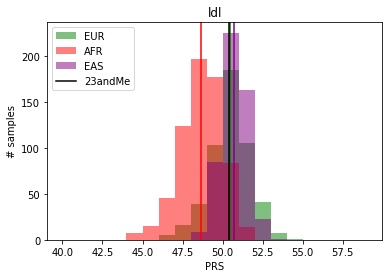

In [12]:
######## Set trait ##########
#trait = "Height"
#trait = "T2D"
trait = "ldl"

if trait == "Height" or trait == "T2D":
    bins = np.arange(-10, 10, 0.5)
elif trait == "ldl":
    bins = np.arange(40, 60, 1)

show_spops = ["EUR","AFR"] # set to list of superpops to display.

####### Load metadata #######
spop_to_color = {
    "EUR": "green",
    "AFR": "red",
    "SAS": "orange",
    "AMR": "blue",
    "EAS": "purple"
}

samp = pd.read_csv("~/public/1000Genomes/igsr_samples.tsv", sep="\t")
samp = samp[["Sample name", "Superpopulation code"]]
samp.columns = ["IID","superpop"]
samp["color"] = samp.apply(lambda x: spop_to_color.get(x["superpop"], "gray"), 1)

######## Load scores ##########
    
# Load my 23andme score
myscore = pd.read_csv("~/public/prs-exercise/results/my_%s.profile"%trait, delim_whitespace=True)["SCORESUM"].values[0]

# Load 1000G scores
data = pd.read_csv("~/public/prs-exercise/results/1000G_%s.profile"%trait, delim_whitespace=True)
data = pd.merge(data, samp, on=["IID"])

######## Plot distributions ##########

fig = plt.figure()
ax = fig.add_subplot(111)

for spop in show_spops:
    ax.hist(data[data["superpop"]==spop]["SCORESUM"], bins=bins, 
            color=spop_to_color[spop], alpha=0.5, label=spop)
    ax.axvline(np.mean(data[data["superpop"]==spop]["SCORESUM"]),
              color=spop_to_color[spop])
ax.axvline(myscore, color="black", label="23andMe")
ax.set_title(trait)
ax.legend(loc="upper left");
ax.set_xlabel("PRS")
ax.set_ylabel("# samples");